In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
defendant_csv = '../data/complete_defendants.csv'
victim_csv = '../data/complete_victims.csv'

defendant_df = pd.read_csv(defendant_csv)
print(len(defendant_df))
victim_df = pd.read_csv(victim_csv)

4341


In [15]:
import numpy as np
print(defendant_df.describe(include=np.object))

for col in list(defendant_df.columns):
    print(defendant_df[col].value_counts())

       occupation       role  gender offenceCategory offenceSubcategory  \
count        4341       4341    4341            4341               4341   
unique        144          1       3               9                 39   
top       servant  defendant  female           theft       grandLarceny   
freq         3932       4341    2454            4087               2236   

       verdictCategory punishmentCategory punishmentSubcategory  \
count             4341               4341                  4341   
unique               5                  7                    21   
top             guilty          transport          noPunishment   
freq              3309               1417                  3283   

       victimOccupation verdictSubcategory  
count              4277               4294  
unique              670                 19  
top            noVictim            unknown  
freq               2572               3037  
servant                        3932
weekly servant             

In [16]:
print(victim_df.describe(include=np.object))

for col in list(victim_df.columns):
    print(victim_df[col].value_counts())

       occupation    role gender offenceCategory offenceSubcategory  \
count         843     843    843             843                843   
unique         72       1      3               8                 26   
top       servant  victim   male           theft       grandLarceny   
freq          639     843    541             656                328   

       verdictCategory defendantOccupation verdictSubcategory  \
count              843                 843                833   
unique               4                  78                 15   
top             guilty             unknown            unknown   
freq               598                 689                687   

       punishmentCategory punishmentSubcategory  
count                 843                   843  
unique                  7                    16  
top             transport          noPunishment  
freq                  255                   663  
servant                                        639
gentleman servant

In [5]:
def_year_counts = defendant_df["year"].value_counts().sort_index()
def_years= def_year_counts.index.to_list()
def_numbers = def_year_counts.to_list()

victim_year_counts = victim_df["year"].value_counts().sort_index()
victim_years = victim_year_counts.index.to_list()
victim_numbers = victim_year_counts.to_list()

Text(0.5, 1.0, 'Servants per year')

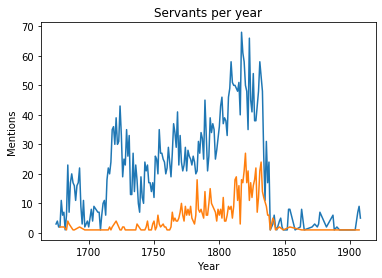

In [6]:
plt.plot(def_years, def_numbers)
plt.plot(victim_years, victim_numbers)
plt.xlabel("Year")
plt.ylabel("Mentions")
plt.title("Servants per year")

In [7]:
def_decade_years= list()
def_decade_counts = list()
vic_decade_years = list()
vic_decade_counts = list()

for label, df in defendant_df.groupby((defendant_df["year"]//10*10)):
    def_decade_years.append(label)
    def_decade_counts.append(len(df))
    
for label, df in victim_df.groupby((victim_df["year"]//10*10)):
    vic_decade_years.append(label)
    vic_decade_counts.append(len(df))

Text(0.5, 1.0, 'Servants per decade')

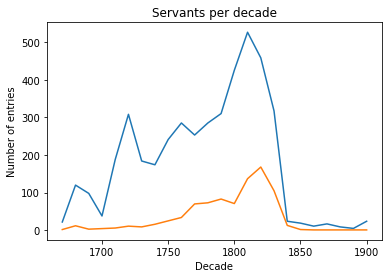

In [8]:
plt.plot(def_decade_years, def_decade_counts)
plt.plot(vic_decade_years, vic_decade_counts)
plt.xlabel("Decade")
plt.ylabel("Number of entries")
plt.title("Servants per decade")


In [9]:
for gender, df in defendant_df.groupby("gender"): 
    print(df)

        occupation  year       role  gender offenceCategory  \
1          servant  1675  defendant  female           theft   
2          servant  1675  defendant  female           theft   
4          servant  1676  defendant  female           theft   
5     servant maid  1676  defendant  female           theft   
6          servant  1676  defendant  female           theft   
...            ...   ...        ...     ...             ...   
4335       servant  1907  defendant  female            kill   
4336       servant  1908  defendant  female   royalOffences   
4338       servant  1908  defendant  female           theft   
4339       servant  1908  defendant  female    violentTheft   
4340       servant  1908  defendant  female   miscellaneous   

     offenceSubcategory verdictCategory punishmentCategory  \
1              burglary         unknown       noPunishment   
2          grandLarceny       notGuilty       noPunishment   
4                 other          guilty       noPunishmen

In [10]:
defendant_df[defendant_df.victimOccupation == 'master']

,occupation,year,role,gender,offenceCategory,offenceSubcategory,verdictCategory,punishmentCategory,punishmentSubcategory,victimOccupation,verdictSubcategory
3,servant,1676,defendant,male,theft,grandLarceny,notGuilty,noPunishment,noPunishment,master,unknown
8,servant wench,1677,defendant,female,theft,burglary,guilty,death,noPunishment,master,unknown
16,maid,1679,defendant,female,damage,arson,notGuilty,noPunishment,noPunishment,master,unknown
20,servant,1679,defendant,male,theft,grandLarceny,guilty,noPunishment,noPunishment,master,unknown
22,servant,1680,defendant,male,theft,grandLarceny,guilty,noPunishment,noPunishment,master,unknown
24,servant,1680,defendant,female,theft,grandLarceny,guilty,death,noPunishment,master,unknown
28,servant wench,1681,defendant,female,theft,grandLarceny,guilty,noPunishment,noPunishment,master,unknown
40,servant,1683,defendant,female,theft,other,guilty,noPunishment,noPunishment,master,theftunder1s
53,hire servant,1684,defendant,female,theft,grandLarceny,guilty,death,noPunishment,master,unknown
54,maid servant,1684,defendant,female,theft,grandLarceny,guilty,death,noPunishment,master,unknown


In [11]:
defendant_df[defendant_df.offenceSubcategory == 'stealingFromMaster']

,occupation,year,role,gender,offenceCategory,offenceSubcategory,verdictCategory,punishmentCategory,punishmentSubcategory,victimOccupation,verdictSubcategory
3594,servant,1823,defendant,female,theft,stealingFromMaster,notGuilty,noPunishment,noPunishment,painter,unknown
3595,servant,1823,defendant,female,theft,stealingFromMaster,guilty,transport,noPunishment,noVictim,unknown
3596,servant,1823,defendant,female,theft,stealingFromMaster,guilty,noPunish,sentenceRespited,noVictim,unknown
3602,servant,1823,defendant,female,theft,stealingFromMaster,guilty,imprison,noPunishment,keep piazza coffee house covent garden,unknown
3606,servant,1823,defendant,male,theft,stealingFromMaster,guilty,noPunish,sentenceRespited,bottle merchant,unknown
...,...,...,...,...,...,...,...,...,...,...,...
4305,servant,1887,defendant,male,theft,stealingFromMaster,guilty,noPunishment,noPunishment,noVictim,pleadedGuilty
4306,servant,1887,defendant,male,theft,stealingFromMaster,guilty,imprison,hardLabour,noVictim,pleadedGuilty
4309,servant,1887,defendant,female,theft,stealingFromMaster,guilty,imprison,hardLabour,noVictim,pleadedGuilty
4312,servant,1890,defendant,female,theft,stealingFromMaster,guilty,imprison,hardLabour,noVictim,pleadedGuilty


In [117]:
fem_def_df = defendant_df[defendant_df['gender']=='female']

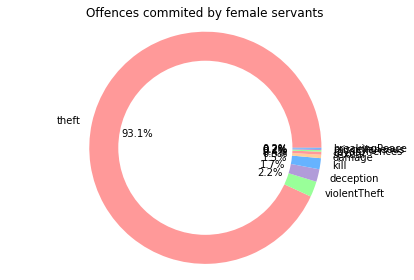

In [109]:
offence_counts = fem_def_df['offenceCategory'].value_counts()
labels=offence_counts.index.to_list()
numbers=offence_counts.to_list()

colors = ['#ff9999','#99ff99', '#b19cd9', '#66b3ff','#ffcc99']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Offences commited by female servants')
plt.tight_layout()

In [115]:
male_def_df = defendant_df[defendant_df['gender']=='male']

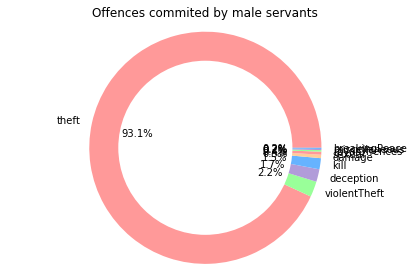

In [108]:
offence_counts = male_def_df['offenceCategory'].value_counts()
labels=offence_counts.index.to_list()
numbers=offence_counts.to_list()


colors = ['#ff9999','#99ff99', '#b19cd9', '#66b3ff','#ffcc99']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Offences commited by male servants')
plt.tight_layout()


In [50]:
male_vic_df = victim_df[victim_df['gender']=='male']

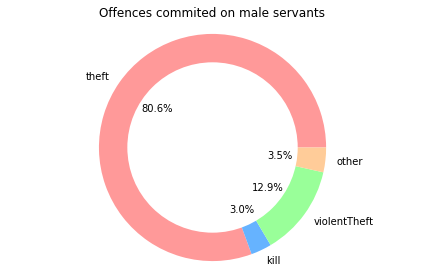

In [96]:
offence_counts = male_vic_df['offenceCategory'].value_counts()
labels=['theft', 'kill', 'violentTheft', 'other']
numbers=[436, 16, 70, 19]
#labels=offence_counts.index.to_list()
#numbers=offence_counts.to_list()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Offences commited on male servants')
plt.tight_layout()

In [52]:
fem_vic_df = victim_df[victim_df['gender']=='female']

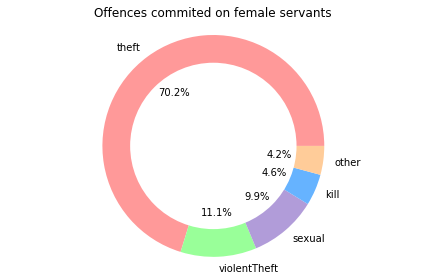

In [106]:
offence_counts = fem_vic_df['offenceCategory'].value_counts()
labels = ['theft', 'violentTheft', 'sexual', 'kill', 'other']
numbers = [184, 29, 26, 12, 11]
#labels=offence_counts.index.to_list()
#numbers=offence_counts.to_list()

colors = ['#ff9999','#99ff99', '#b19cd9', '#66b3ff','#ffcc99']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Offences commited on female servants')
plt.tight_layout()

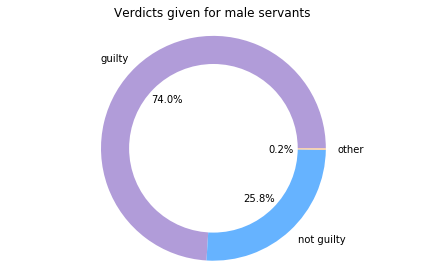

In [119]:
labels = ['guilty', 'not guilty', 'other']
numbers = [1396, 486, 4]

colors = ['#b19cd9', '#66b3ff','#ffcc99']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Verdicts given for male servants')
plt.tight_layout()

guilty         1912
notGuilty       535
unknown           6
miscVerdict       1
Name: verdictCategory, dtype: int64


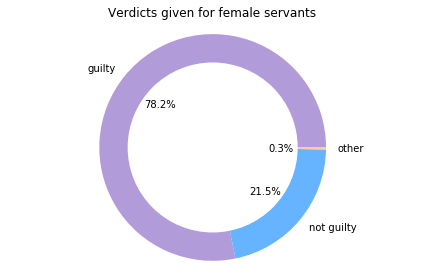

In [121]:
print(fem_def_df['verdictCategory'].value_counts())
numbers = [1912, 525, 7] 

colors = ['#b19cd9', '#66b3ff','#ffcc99']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Verdicts given for female servants')
plt.tight_layout()

guilty            176
notGuilty          83
unknown             2
specialVerdict      1
Name: verdictCategory, dtype: int64


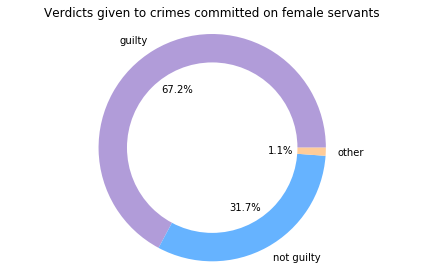

In [124]:
print(fem_vic_df['verdictCategory'].value_counts())
numbers = [176, 83, 3]

colors = ['#b19cd9', '#66b3ff','#ffcc99']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Verdicts given to crimes committed on female servants')
plt.tight_layout()

guilty       393
notGuilty    148
Name: verdictCategory, dtype: int64


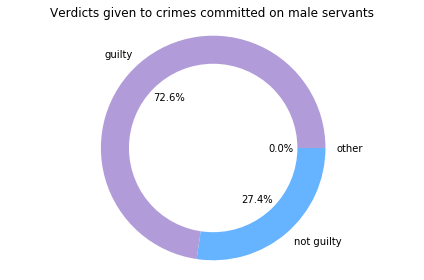

In [127]:
print(male_vic_df['verdictCategory'].value_counts())
numbers = [393, 148, 0]

colors = ['#b19cd9', '#66b3ff','#ffcc99']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Verdicts given to crimes committed on male servants')
plt.tight_layout()

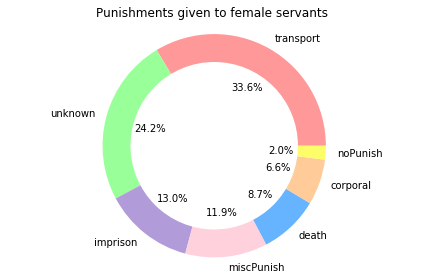

In [146]:
#print(fem_def_df['punishmentCategory'].value_counts())
labels= fem_def_df['punishmentCategory'].value_counts().index.to_list()
labels= ['unknown' if x=='noPunishment' else x for x in labels]
numbers = fem_def_df['punishmentCategory'].value_counts().to_list()

colors = ['#ff9999','#99ff99', '#b19cd9', '#ffd1dc', '#66b3ff','#ffcc99', '#fdfd69']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Punishments given to female servants')
plt.tight_layout()

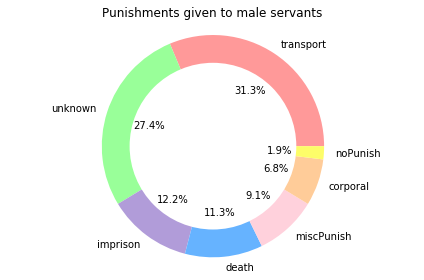

In [150]:
labels= male_def_df['punishmentCategory'].value_counts().index.to_list()
labels= ['unknown' if x=='noPunishment' else x for x in labels]
numbers = male_def_df['punishmentCategory'].value_counts().to_list()

colors = ['#ff9999','#99ff99', '#b19cd9', '#66b3ff', '#ffd1dc','#ffcc99', '#fdfd69']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Punishments given to male servants')
plt.tight_layout()

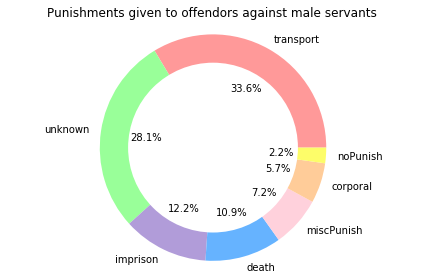

In [151]:
labels= male_vic_df['punishmentCategory'].value_counts().index.to_list()
labels= ['unknown' if x=='noPunishment' else x for x in labels]
numbers = male_vic_df['punishmentCategory'].value_counts().to_list()

colors = ['#ff9999','#99ff99', '#b19cd9', '#66b3ff', '#ffd1dc','#ffcc99', '#fdfd69']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Punishments given to offendors against male servants')
plt.tight_layout()

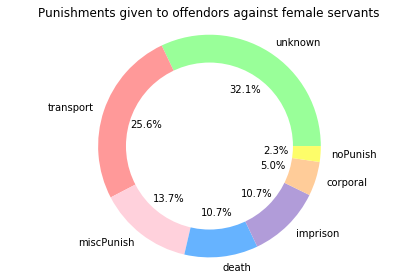

In [154]:
labels= fem_vic_df['punishmentCategory'].value_counts().index.to_list()
labels= ['unknown' if x=='noPunishment' else x for x in labels]
numbers = fem_vic_df['punishmentCategory'].value_counts().to_list()

colors = ['#99ff99','#ff9999', '#ffd1dc', '#66b3ff',  '#b19cd9','#ffcc99', '#fdfd69']

fig1, ax1 = plt.subplots()

ax1.pie(numbers,
        labels=labels, 
        autopct = '%1.1f%%',
        colors=colors)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  

plt.title('Punishments given to offendors against female servants')
plt.tight_layout()